In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../data/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
import cv2

import torch
torch.__version__

'2.2.2+cu118'

In [2]:
df = pd.read_csv('full_df.csv')

df.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


In [3]:
raw_data = df.drop(columns=['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'labels'])

raw_data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,filepath,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


The number of classes will correspond to the number of unique lables in the `labels` column, this data set contains 8 classes corresponding the the diagnosis in the list above

In [4]:
raw_data["target"].unique().size

8

In [5]:
raw_data.shape

(6392, 10)

In [8]:
targets = np.array(raw_data["target"].apply(lambda x: json.loads(x)).tolist())


targets.shape

(6392, 8)

In [6]:
classes = { 0: "Normal",
            1: "Diabetes",
            2: "Glaucoma",
            3: "Cataract",
            4: "Age related Macular Degeneration",
            5: "Hypertension",
            6: "Pathological Myopia",
            7: "Other diseases/abnormalities"
          }

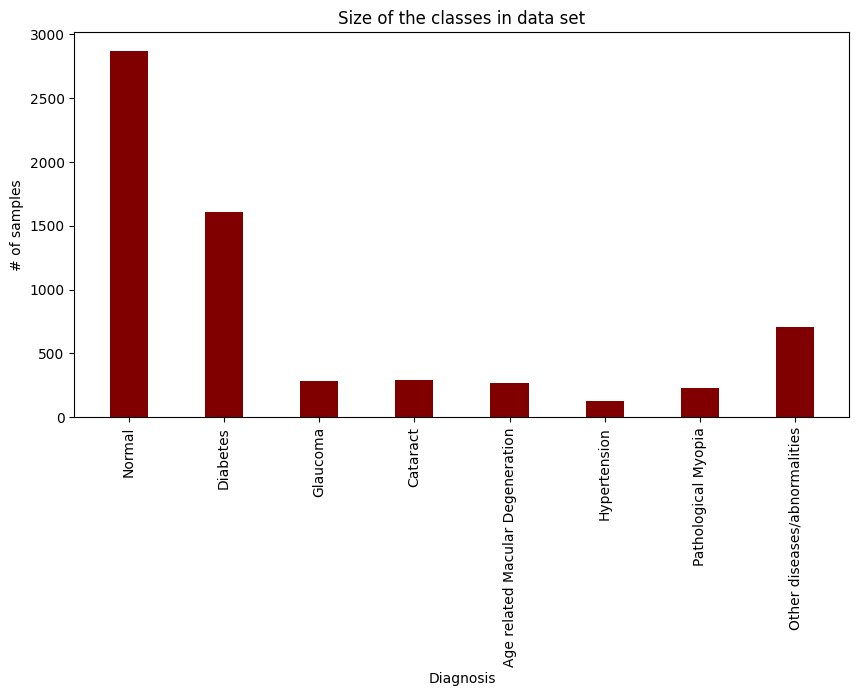

In [9]:
# creating the dataset
data = np.sum(targets, axis=0)

classes_names = list(classes.values())
values = list(data)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classes_names, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Diagnosis")
plt.ylabel("# of samples")
plt.title("Size of the classes in data set")

plt.xticks(rotation=90)

plt.show()

In [10]:
img_dir = "preprocessed_images"

In [11]:
raw_data["class_name"] = np.argmax(targets, axis=1).tolist()
raw_data["class_name"] = raw_data["class_name"] .replace(classes)

raw_data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,filepath,target,filename,class_name
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,Normal
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,Diabetes


C:\Users\vaibh\AppData\Local\Temp\ipykernel_24880\4177161297.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 4, 4 * i + j + 1)


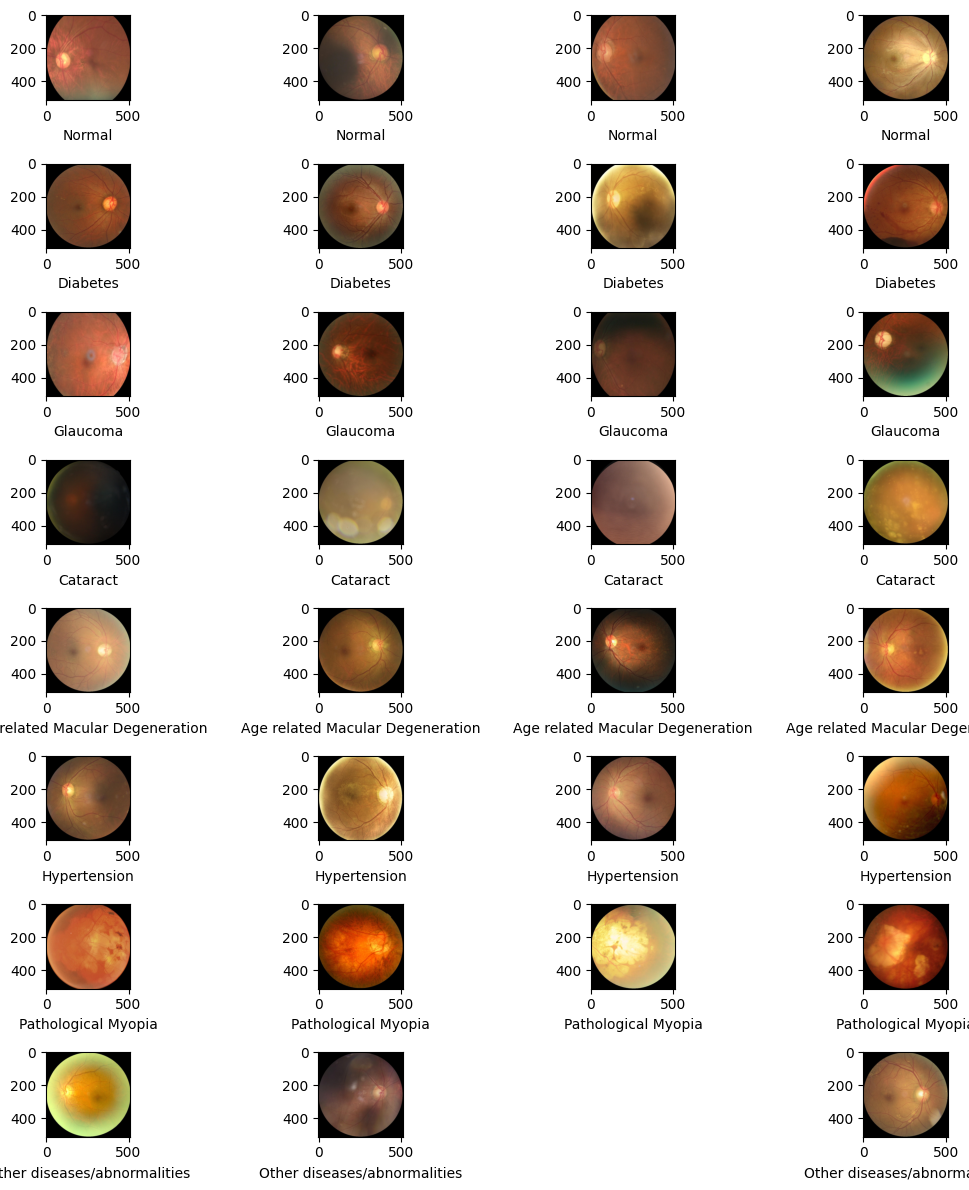

In [12]:
plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes.values()):
    
    class_subset = raw_data.loc[raw_data.class_name == class_name].sample(n=4)
    
    img_names = class_subset.filename.to_list()
    
    for j, img in enumerate(img_names):
        image = cv2.imread(os.path.join(img_dir, img))
        
        ## convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ## subplot variables - (# of rows, # of columns, iterate through locations on grid)
        plt.subplot(8, 4, 4 * i + j + 1)
        plt.imshow(image_rgb, aspect=1)
        
        ## label with filename and diagnosis
        plt.xlabel('{}'.format(class_name))

        plt.tight_layout() 

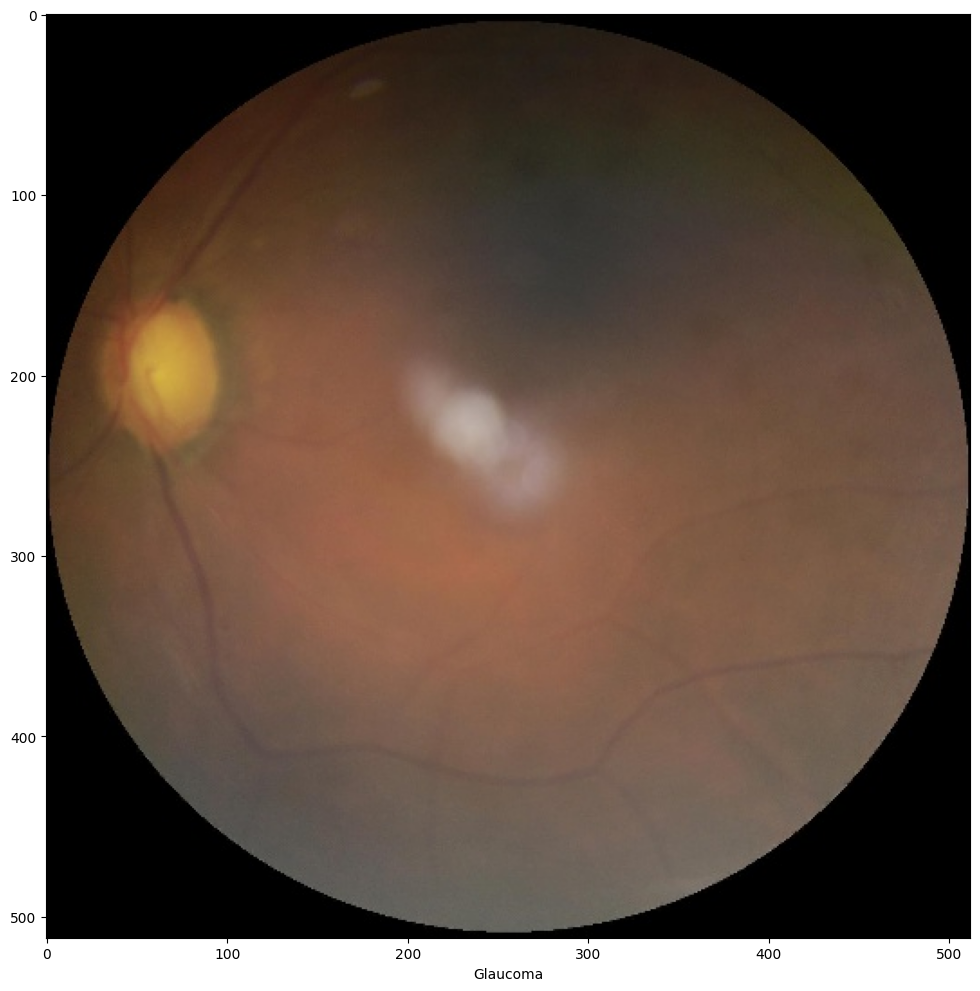

In [13]:
plt.figure(figsize=(12, 12))

single_class = ["Glaucoma"]

for i, class_name in enumerate(single_class):
    
    class_subset = raw_data.loc[raw_data.class_name == class_name].sample(n=4)
    
    img_names = class_subset.filename.to_list()
    
    for j, img in enumerate(img_names):
        image = cv2.imread(os.path.join(img_dir, img))
        
        ## convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ## subplot variables - (# of rows, # of columns, iterate through locations on grid)
        # plt.subplot(8, 4, 4 * i + j + 1)
        plt.imshow(image_rgb, aspect=1)
        
        ## label with filename and diagnosis
        plt.xlabel('{}'.format(class_name))

In [14]:
processed_labels = raw_data[["ID", "filename", "class_name", "target"]]
processed_labels.to_csv('labels_clean.csv', index=False)

processed_labels.head()

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,2_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,4_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,5_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [15]:
# Import libraries
import json
import os
import pickle
import random
import time

# Ignore warnings
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from skimage import io, transform
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler

# PyTorch dataset
from torchvision import datasets, models, transforms, utils
from torchvision.utils import make_grid

warnings.filterwarnings("ignore")

plt.ion()  # interactive mode

from __future__ import print_function, division

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [16]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [17]:
!nvidia-smi

Thu Apr  4 21:07:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8               2W /  50W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [18]:
def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [21]:
def show_images(image):
    """Show image"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [22]:
class OcularDiseaseRecognition(Dataset):
    """Ocular Disease Recognition."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with labels.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels_frame.iloc[idx, 1])
        image = io.imread(img_name)
        target = self.labels_frame.iloc[idx, 3]
        target = np.array(json.loads(target))
        sample = {'image': image, 'labels': target}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, label = sample['image'], sample['labels']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'labels': label}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, label = sample['image'], sample['labels']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]


        return {'image': image, 'labels': label}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['labels']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'labels': torch.from_numpy(label)}

In [23]:
# !pwd
import os
cwd = os.getcwd()
print(cwd)


c:\Users\vaibh\OneDrive\Desktop\Nitin


In [24]:
labels = pd.read_csv('labels_clean.csv')

n = 65
img_name = labels.iloc[n, 1]
class_name =  labels.iloc[n, 2]
target = labels.iloc[n, 3]

print('Image name: {}'.format(img_name))
print('Class Name: {}'.format(class_name))
print('Target: {}'.format(target))

Image name: 81_right.jpg
Class Name: Diabetes
Target: [0, 1, 0, 0, 0, 0, 0, 0]


In [25]:
labels.head(2)

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [26]:
labels.shape

(6392, 4)

In [27]:
# number of subprocesses to use for data loading
num_workers = 2
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.2
test_size = 0.2

In [28]:
# choose the training and test datasets
img_dir = "preprocessed_images"
labels_dir = 'labels_clean.csv'

full_data  = OcularDiseaseRecognition(csv_file=labels_dir, 
                                      root_dir=img_dir, 
                                      transform=transforms.Compose([Rescale(512),
                                                                    ToTensor()])
                                     )

In [29]:
# obtain training indices that will be used for validation
num_train = len(full_data)
indices = list(range(num_train))

np.random.shuffle(indices)

val_split = int(np.floor(valid_size * num_train))
test_split = int(np.floor(valid_size * num_train))


test_idx, valid_idx, train_idx = indices[:test_split], indices[test_split: test_split + val_split], indices[test_split + val_split:]

In [30]:
num_train

6392

In [31]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler  = SubsetRandomSampler(test_idx)

In [32]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(full_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(full_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(full_data, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)

In [33]:
len(train_loader)

120

In [35]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [ ]:
device_name = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

print(device_name)

In [ ]:
def save_checkpoint(state, is_best, filename='/kaggle/working/bt_resnet50_ckpt_v2.pth.tar'):
    torch.save(state, filename)

In [ ]:
# instantiate transfer learning model
resnet_model = models.resnet50(pretrained=True)

# set all parameters as trainable
for param in resnet_model.parameters():
    param.requires_grad = True

# get input of fc layer
n_inputs = resnet_model.fc.in_features

# redefine fc layer / top layer/ head for our classification problem
resnet_model.fc = nn.Sequential(nn.Linear(n_inputs, 2048),
                                nn.ReLU(),
                                nn.Dropout(p=0.4),
                                nn.Linear(2048, 2048),
                                nn.ReLU(),
                                nn.Dropout(p=0.4),
                                nn.Linear(2048, 8),
                                nn.LogSigmoid())

# set all parameters of the model as trainable
for name, child in resnet_model.named_children():
    for name2, params in child.named_parameters():
        params.requires_grad = True


# Disbribute the model to all GPU's
resnet_model = nn.DataParallel(resnet_model)

# set model to run on GPU or CPU absed on availibility
resnet_model.to(device)

# print the trasnfer learning NN model's architecture
resnet_model

In [ ]:
# Limit maximum memory usage to 1GB

# torch.backends.cuda.reserved_memory = 4 * 1024 * 1024 * 1024
# torch.backends.cuda.max_allocated_memory = 4 * 1024 * 1024 * 1024

In [ ]:
# loss function
# if GPU is available set loss function to use GPU
criterion = nn.CrossEntropyLoss().to(device)

# optimizer
optimizer = torch.optim.SGD(resnet_model.parameters(), momentum=0.9, lr=3e-4)


# empty lists to store losses and accuracies
train_losses = []
test_losses = []
train_correct = []
test_correct = []

In [ ]:
# number of training iterations
epochs = 32

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# set training start time
start_time = time.time()

# set best_prec loss value as 2 for checkpoint threshold
best_prec1 = 2
is_best = False

# empty batch variables
b = None
train_b = None
test_b = None

scaler = GradScaler()

for i in range(epochs):
    # empty training correct and test correct counter as 0 during every iteration
    trn_corr = 0
    tst_corr = 0
    trn_loss = 0
    tst_loss = 0
    
    # set epoch's starting time
    e_start = time.time()
    

    # train in batches
    for b, sample in enumerate(train_loader):
        # set label as cuda if device is cuda
        X, y = sample['image'].to(device, dtype=torch.float), sample['labels'].to(device, dtype=torch.float)
        
        # forward pass image sample
        y_pred = resnet_model(X.view(-1, 3, 512, 512))

        # calculate loss
        loss = criterion(y_pred.float(), y.float())

        trn_loss += loss.item()
        # get argmax of predicted tensor, which is our label
        predicted = torch.argmax(y_pred, dim=1).data
        y = torch.argmax(y, dim=1).data

        # if predicted label is correct as true label, calculate the sum for samples

        batch_corr = (predicted == y).sum()
        # increment train correct with correcly predicted labels per batch
        trn_corr += batch_corr.item()
        
        # set optimizer gradients to zero
        optimizer.zero_grad()
        # Backpropagate with autocasting
        # back propagate with loss
        scaler.scale(loss).backward()
        # perform optimizer step
        scaler.step(optimizer)
        scaler.update()
      
    # set epoch's end time
    e_end = time.time()
    
    # print training metrics
    print(f'Epoch {(i+1)} Batch {(b+1)}\nAccuracy: {trn_corr*100/(b*batch_size):2.2f} %  Loss: {trn_loss/len(train_loader):2.4f}  Duration: {((e_end-e_start)/60):.2f} minutes') 
    
    # some metrics storage for visualization
    train_b = b
    train_losses.append(trn_loss)
    train_correct.append(trn_corr)

    X, y = None, None

    # validate using validation generator
    # do not perform any gradient updates while validation
    with torch.no_grad():
        for b, sample in enumerate(valid_loader):
            # set label as cuda if device is cuda
            X, y = sample['image'].to(device, dtype=torch.float), sample['labels'].to(device, dtype=torch.float)

            # forward pass image
            y_val = resnet_model(X.view(-1, 3, 512, 512))

            # get argmax of predicted tensor, which is our label
            predicted = torch.argmax(y_val, dim=1).data
            y = torch.argmax(y, dim=1).data

            # increment test correct with correcly predicted labels per batch
            tst_corr += (predicted == y).sum().item()

            # get loss of validation set
            loss = criterion(y_val.float(), y.long())
            tst_loss += loss.item()
            
            
    # print validation metrics
    print(f'Validation Accuracy {tst_corr*100/(b*batch_size):2.2f}% Validation Loss: {tst_loss/len(valid_loader):2.4f}\n')

    # if current validation loss is less than previous iteration's validatin loss create and save a checkpoint
    is_best = loss < best_prec1
    best_prec1 = min(loss, best_prec1)
    
    if is_best:
        save_checkpoint({
                'epoch': i + 1,
                'state_dict': resnet_model.state_dict(),
                'best_prec1': best_prec1,
            }, is_best)
        
        is_best = False

    # some metrics storage for visualization
    test_b  = b
    test_losses.append(tst_loss)
    test_correct.append(tst_corr)

# set total training's end time
end_time = time.time() - start_time    

# print training summary
print("\nTraining Duration {:.2f} minutes".format(end_time/60))
print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
print("GPU memory cached : {} kb".format(torch.cuda.memory_cached()))

In [ ]:
print(f'Validation accuracy: {test_correct[-1]*100/(test_b*batch_size):.2f}%')

In [ ]:
plt.plot([t/test_b*batch_size for t in torch.tensor(test_correct).cpu()], label='Validation accuracy')

plt.title('Accuracy Metrics')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()